In [1]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

print("Libraries installed!")

Libraries installed!


In [2]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [3]:
df_data = pd.read_csv('Google_Stock_Price_Train.csv',index_col="Date", parse_dates=True)
df_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
df_data.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


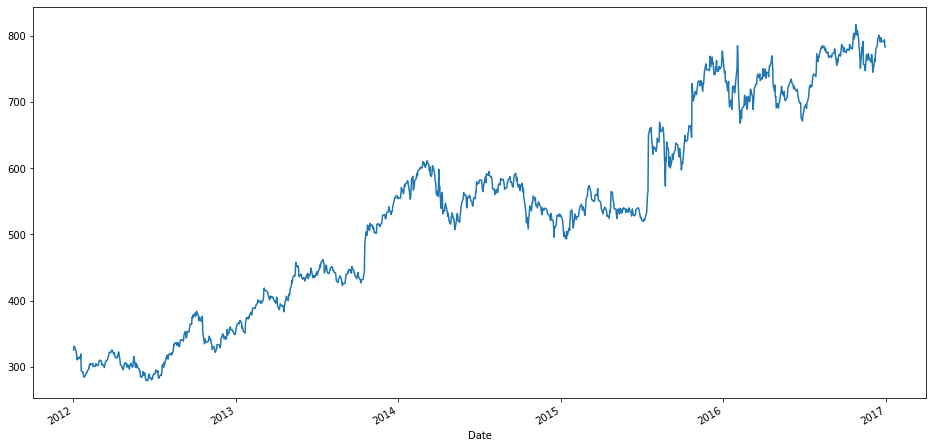

In [6]:
df_data['Open'].plot(figsize=(16,8))

In [7]:
# convert column "a" of a DataFrame
df_data["Close"] = df_data["Close"].str.replace(',', '').astype(float)

In [8]:
df_data["Volume"] = df_data["Volume"].str.replace(',', '').astype(float)

In [9]:
# 7 day rolling mean
df_data.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


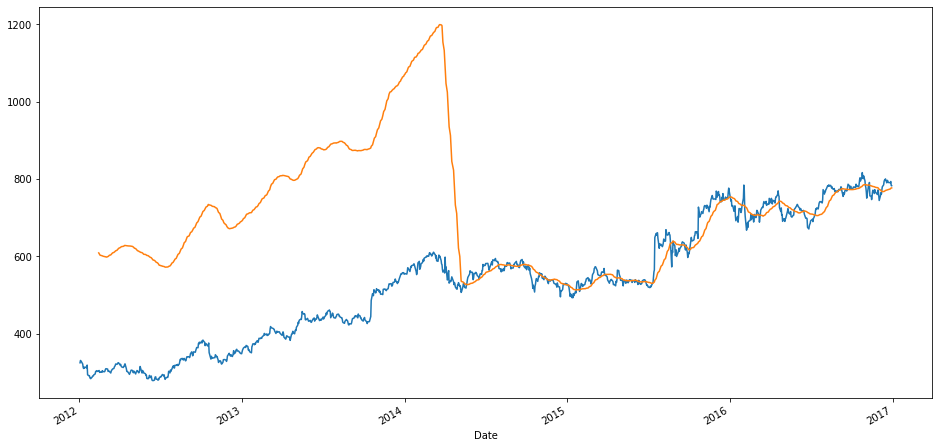

In [11]:
df_data['Open'].plot(figsize=(16,8))
df_data.rolling(window=30).mean()['Close'].plot()

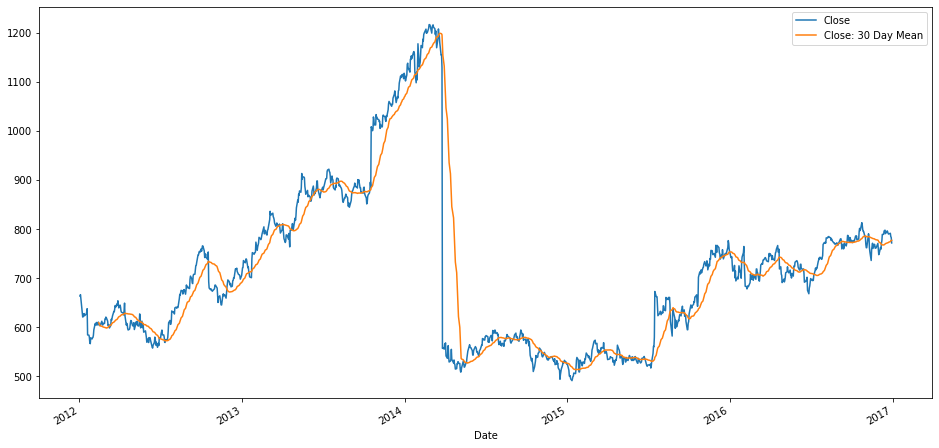

In [12]:
df_data['Close: 30 Day Mean'] = df_data['Close'].rolling(window=30).mean()
df_data[['Close','Close: 30 Day Mean']].plot(figsize=(16,8))

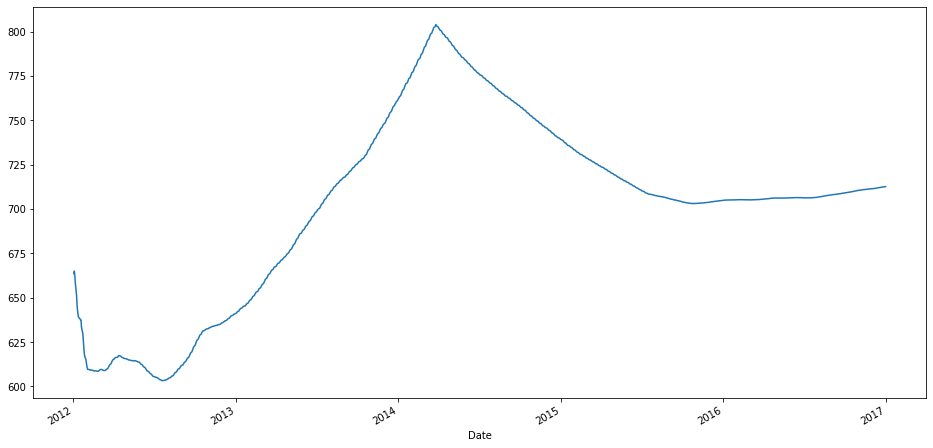

In [13]:
#Optional: specify a minimum number of periods
df_data['Close'].expanding(min_periods=1).mean().plot(figsize=(16,8))

In [14]:
# Creating our Train Set DataFrame

training_set= df_data['Open']
training_set= pd.DataFrame(training_set)

In [15]:
# Data cleaning

df_data.isna().any()

Open                  False
High                  False
Low                   False
Close                 False
Volume                False
Close: 30 Day Mean     True
dtype: bool

In [16]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [17]:
# Creating a data structure with 60 timestamps and 1 output

X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60: i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping

X_train= np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [18]:
# Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [19]:
# Initializing the RNN

regressor = Sequential()

In [20]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units= 50, return_sequences = True, input_shape= (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units= 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units= 50, return_sequences = True))
regressor.add(Dropout(0.2))


# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units= 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [21]:
# Compiling the RNN

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0344
Epoch 2/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0067
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0050
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0053
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0054
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0051
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0047
Epoch 10/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0039
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0042
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - lo

In [22]:
# Load the test data
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


In [23]:
test_data = pd.read_csv('Google_Stock_Price_Test.csv',index_col="Date", parse_dates=True)
test_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [24]:
real_stock_price = test_data.iloc[:, 1:2].values

In [25]:
test_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [27]:
test_data['Volume'] = test_data['Volume'].str.replace(',', '').astype(float)

In [28]:
test_set = test_data['Open']
test_set = pd.DataFrame(test_set)

In [29]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [31]:
#Getting the predicted stock price of 2017
df_data_total = pd.concat((df_data['Open'], test_data['Open']), axis=0)
inputs = df_data_total[len(df_data_total) - len(test_data) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [32]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


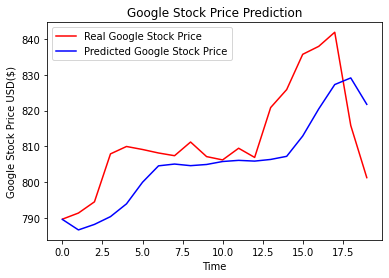

In [34]:
#Visualize the results
plt.plot(real_stock_price, color= 'red', label= 'Real Google Stock Price')
plt.plot(predicted_stock_price, color= 'blue', label= 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price USD($)')
plt.legend()
plt.show()